imNames ['dimer_i001', 'dimer_i002', 'dimer_i003', 'dimer_i004', 'dimer_i005']


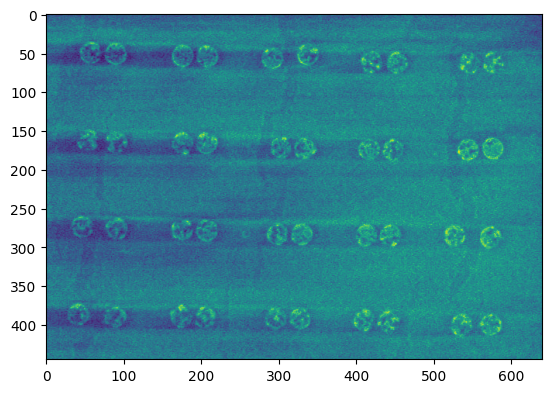

In [2]:
from utils4ImAnalysis import locateFileNameExt, blur_filter, L, edge_f, edge_detection
from PIL import Image, ImageFilter
Filters = [
            ImageFilter.BLUR,
            ImageFilter.CONTOUR,
            ImageFilter.DETAIL,
            ImageFilter.EDGE_ENHANCE,
            ImageFilter.EDGE_ENHANCE_MORE,
            ImageFilter.EMBOSS,
            ImageFilter.FIND_EDGES,
            ImageFilter.SHARPEN,
            ImageFilter.SMOOTH,
            ImageFilter.SMOOTH_MORE,
            ImageFilter.GaussianBlur,
            ImageFilter.MedianFilter,
            ImageFilter.MaxFilter,
            ImageFilter.MinFilter,
            ImageFilter.Kernel(
                                (3, 3),
                                (
                                    -1, -1, -1,
                                    -1,  8, -1, 
                                    -1, -1, -1
                                ),
                                1,
                                0
                            ),
            ImageFilter.BoxBlur(radius = 3),
            ImageFilter.UnsharpMask(radius=3, percent=150, threshold=3),
            ImageFilter.ModeFilter(size=3),
            # ImageFilter.Kernel(
            #                     (3, 3),
            #                     (
            #                         -0, -1, -0,
            #                         -1,  4, -1, 
            #                         -0, -1, -0,
            #                     ),
            #                     1,
            #                     0
            #                 ),


            # ImageFilter.RankFilter(size = size, rank = int(size**3 / (3*2))),
            ImageFilter.BoxBlur(radius = 0),
            # size – The kernel size, in pixels.
            # rank – What pixel value to pick.
            # Use 0 for a min filter,
            # size * size / 2 for a median filter,
            # size * size - 1 for a max filter, etc.
            # ImageFilter.Color3DLUT,
        ]
import matplotlib.pyplot as plt
import numpy as np
import os, sys


#filtering module 
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d

name:str = 'dimer_i00{}'.format(1)
imPaths = locateFileNameExt(containInName= "dimer_i00", ext=".jpg")
imNames = [imPath.split('\\')[-1].split('.')[0] for imPath in imPaths]
print('imNames', imNames)

im = Image.open(imPaths[2]); imArray = np.array(im)[:-35, :]
nlines, ncolumns = imHeigh, imWidth = imWidth, imHeigh = im.size
# print(im.size, imArray.shape)
plt.imshow(Image.fromarray(imArray))



imNames = [
    'dimer_i001',
    'dimer_i002',
    'dimer_i003', 
    'dimer_i004',
    'dimer_i005'
]

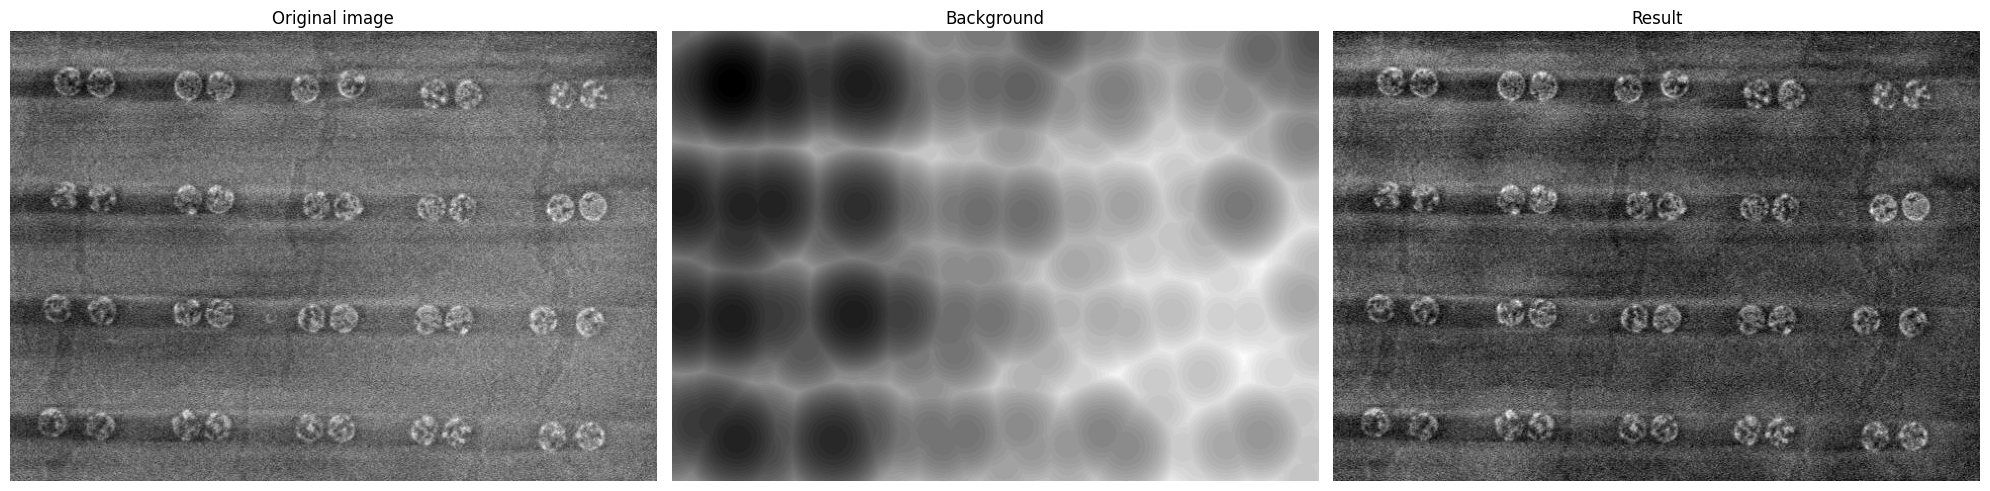

In [89]:
import imageio
import pywt
# https://pywavelets.readthedocs.io/en/latest/
from skimage import (
    data, restoration, util
)


def plot_result(image:np.array, background:np.array, figsize:tuple=(10,5)):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original image')
    ax[0].axis('off')

    ax[1].imshow(background, cmap='gray')
    ax[1].set_title('Background')
    ax[1].axis('off')

    ax[2].imshow(image - background, cmap='gray')
    ax[2].set_title('Result')
    ax[2].axis('off')

    fig.tight_layout()


# image = data.coins()
image = imArray
background = restoration.rolling_ball(image)
imageResult = image - background


plot_result(image, background, figsize=(20,10))
plt.savefig('monku.pdf')

#Exemple de détection d'ellipse

src : https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html

https://programtalk.com/python-examples/skimage.measure.regionprops/

https://pyimagesearch.com/2016/02/08/opencv-shape-detection/



paper on shape detection:
https://www.researchgate.net/publication/360935951_Application_of_Python-OpenCV_to_detect_contour_of_shapes_and_colour_of_a_real_image

Realtime shape detection - cv2:
https://pysource.com/2018/12/29/real-time-shape-detection-opencv-with-python-3/

useless:

facedetection : https://realpython.com/traditional-face-detection-python/



filtre classique:
scharr
sobel



rolling-ball algorithm


détection bord :  
canny


l'algo sift:
Harris-stephens
Moravek

In [99]:
# src : https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate


image = np.zeros((600, 600))

rr, cc = ellipse(300, 350, 100, 220)
image[rr, cc] = 1

image = rotate(image, angle=15, order=0)

rr, cc = ellipse(100, 100, 60, 50)
image[rr, cc] = 1

label_img = label(image)
regions = regionprops(label_img)

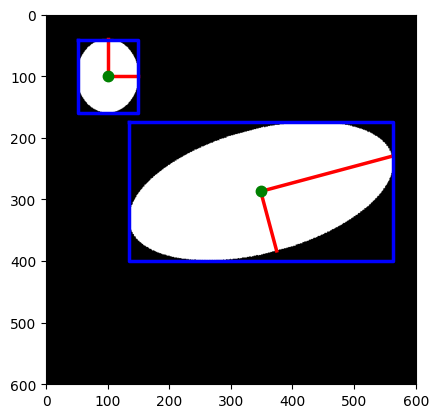

In [92]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

ellipse_properties = {'centers':[]}

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.axis((0, 600, 600, 0))
plt.show()

In [93]:
props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'axis_major_length',
                                                 'axis_minor_length'))

In [94]:
pd.DataFrame(props)

,centroid-0,centroid-1,orientation,axis_major_length,axis_minor_length
0,100.000000,100.000000,0.000000,119.807049,99.823995
1,286.914167,348.412995,-1.308966,440.015503,199.918850


# La suite ne fonctionne pas avec la 3.10 - et c'est pénible

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'skip',
              'hovertemplate': 'x: %{x}<br>y: %{y}<extra></extra>',
              'name': '0',
              'source': ('data:image/png;base64,iVBORw0K' ... '9/RM31beB0t0UAAAAASUVORK5CYII='),
              'type': 'image',
              'xaxis': 'x',
              'yaxis': 'y'},
             {'fill': 'toself',
              'hoveron': 'points+fills',
              'hovertemplate': ('<b>area: 2556.00</b><br><b>ecc' ... 'intensity_mean: 158.30</b><br>'),
              'mode': 'lines',
              'name': '2',
              'showlegend': False,
              'type': 'scatter',
              'x': array([338. , 337. , 336. , ..., 339. , 338.5, 338. ]),
              'y': array([71.5, 71.5, 71.5, ..., 70.5, 71. , 71.5])},
             {'fill': 'toself',
              'hoveron': 'points+fills',
              'hovertemplate': ('<b>area: 1684.00</b><br><b>ecc' ... 'intensity_mean: 168.42</b><br>'),
              'mode': 'lines',
              'name': '3',
              'showlegend': False,
              'type': 'scatter',
              'x': array([158. , 157. , 156. , 155. , 154. , 153. , 152. , 151.5, 151. , 150. ,
                          149. , 148. , 147.5, 147. , 146. , 145.5, 145. , 144. , 143.5, 143. ,
                          142.5, 142. , 141. , 140.5, 140. , 139.5, 139. , 138.5, 138. , 137. ,
                          136.5, 136. , 135.5, 135.5, 135. , 134.5, 134.5, 134. , 133.5, 133.5,
                          133. , 132.5, 132.5, 132.5, 132.5, 132. , 131. , 130.5, 131. , 131.5,
                          131.5, 131.5, 131.5, 131. , 130.5, 131. , 131.5, 131.5, 131.5, 131.5,
                          132. , 132.5, 132. , 131. , 130.5, 131. , 132. , 133. , 133.5, 133.5,
                          134. , 134.5, 135. , 135.5, 135.5, 136. , 136.5, 137. , 137.5, 138. ,
                          138.5, 139. , 139.5, 140. , 141. , 141.5, 142. , 142.5, 143. , 143.5,
                          144. , 145. , 145.5, 146. , 147. , 148. , 149. , 149.5, 150. , 151. ,
                          152. , 153. , 154. , 154.5, 155. , 156. , 157. , 158. , 159. , 159.5,
                          160. , 161. , 162. , 163. , 163.5, 164. , 165. , 165.5, 166. , 167. ,
                          167.5, 168. , 168.5, 169. , 169.5, 170. , 171. , 171.5, 171.5, 172. ,
                          172.5, 173. , 173.5, 173.5, 174. , 174.5, 174.5, 175. , 175.5, 176. ,
                          176.5, 176.5, 177. , 177.5, 177.5, 177.5, 177.5, 178. , 178.5, 178.5,
                          178.5, 178.5, 178.5, 178.5, 178.5, 178.5, 178.5, 178.5, 178. , 177.5,
                          177.5, 177.5, 177. , 176.5, 176.5, 176. , 175.5, 175. , 174.5, 174.5,
                          174. , 173.5, 173. , 172.5, 172. , 171.5, 171. , 170.5, 170. , 169. ,
                          168.5, 168. , 167. , 166.5, 166. , 165. , 164. , 163.5, 163. , 162. ,
                          161. , 160. , 159. , 158.5, 158. ]),
              'y': array([73.5, 73.5, 73.5, 73.5, 73.5, 73.5, 73.5, 73. , 72.5, 72.5, 72.5, 72.5,
                          72. , 71.5, 71.5, 71. , 70.5, 70.5, 70. , 69.5, 69. , 68.5, 68.5, 68. ,
                          67.5, 67. , 66.5, 66. , 65.5, 65.5, 65. , 64.5, 64. , 63. , 62.5, 62. ,
                          61. , 60.5, 60. , 59. , 58.5, 58. , 57. , 56. , 55. , 54.5, 54.5, 54. ,
                          53.5, 53. , 52. , 51. , 50. , 49.5, 49. , 48.5, 48. , 47. , 46. , 45. ,
                          44.5, 44. , 43.5, 43.5, 43. , 42.5, 42.5, 42.5, 42. , 41. , 40.5, 40. ,
                          39.5, 39. , 38. , 37.5, 37. , 36.5, 36. , 35.5, 35. , 34.5, 34. , 33.5,
                          33.5, 33. , 32.5, 32. , 31.5, 31. , 30.5, 30.5, 30. , 29.5, 29.5, 29.5,
                          29.5, 29. , 28.5, 28.5, 28.5, 28.5, 28.5, 28. , 27.5, 27.5, 27.5, 27.5,
                          27.5, 28. , 28.5, 28.5, 28.5, 28.5, 29. , 29.5, 29.5, 30. , 30.5, 30.5,
                          31. , 31.5, 32. , 32.5, 33. , 33
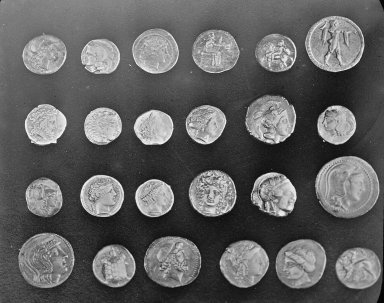

In [98]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology

img = data.coins()
# img = imageResult
# Binary image, post-process the binary mask and compute labels
threshold = filters.threshold_otsu(img)
mask = img > threshold
mask = morphology.remove_small_objects(mask, 50)
mask = morphology.remove_small_holes(mask, 50)
labels = measure.label(mask)

fig = px.imshow(img, binary_string=True)
fig.update_traces(hoverinfo='skip') # hover is only for label info

props = measure.regionprops(labels, img)
properties = ['area', 'eccentricity', 'perimeter', 'intensity_mean']

# For each label, add a filled scatter trace for its contour,
# and display the properties of the label in the hover of this trace.
for index in range(1, labels.max()):
    label_i = props[index].label
    contour = measure.find_contours(labels == label_i, 0.5)[0]
    y, x = contour.T
    hoverinfo = ''
    for prop_name in properties:
        hoverinfo += f'<b>{prop_name}: {getattr(props[index], prop_name):.2f}</b><br>'
    fig.add_trace(go.Scatter(
        x=x, y=y, name=label_i,
        mode='lines', fill='toself', showlegend=False,
        hovertemplate=hoverinfo, hoveron='points+fills'))

# plotly.io.show(fig)
fig

AttributeError: '<class 'skimage.measure._regionprops.RegionProperties'>' object has no attribute 'bboxfeature'

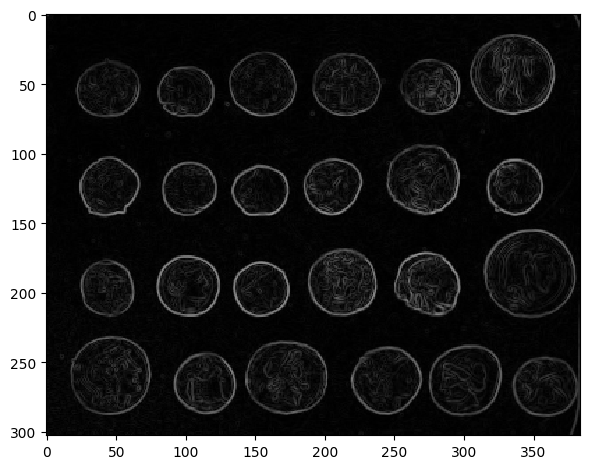

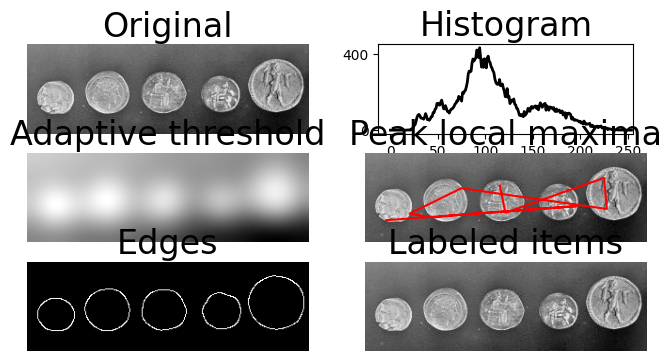

In [101]:
# https://peerj.com/articles/453/ 
# https://scikit-image.org/
# https://peerj.com/articles/453/#fig-1
# pip install -U scikit-image

#%%
#-----------------------------------------------------------------------#
from skimage import (data, io, )
from skimage import filters 
from skimage import feature 
from PIL import ImageFilter

image = data.coins()  # or any NumPy array!
edges = filters.sobel(image)
io.imshow(edges)
#-----------------------------------------------------------------------#
import numpy as np
import matplotlib.pyplot as plt

# Load a small section of the image.
image = data.coins()[0:95, 70:370]

fig, axes = plt.subplots(ncols=2, nrows=3,
                         figsize=(8, 4))
ax0, ax1, ax2, ax3, ax4, ax5  = axes.flat
ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title('Original', fontsize=24)
ax0.axis('off')

#-----------------------------------------------------------------------#
# Histogram.
values, bins = np.histogram(image,
                            bins=np.arange(256))

ax1.plot(bins[:-1], values, lw=2, c='k')
ax1.set_xlim(xmax=256)
ax1.set_yticks([0, 400])
ax1.set_aspect(.2)
ax1.set_title('Histogram', fontsize=24)

#-----------------------------------------------------------------------#
# Apply threshold.
from skimage.filters import threshold_local

bw = threshold_local(image, 95, offset=-15)

ax2.imshow(bw, cmap=plt.cm.gray)
ax2.set_title('Adaptive threshold', fontsize=24)
ax2.axis('off')

#-----------------------------------------------------------------------#
# Find maxima.
from skimage.feature import peak_local_max

coordinates = peak_local_max(image, min_distance=20)

ax3.imshow(image, cmap=plt.cm.gray)
ax3.autoscale(False)
ax3.plot(coordinates[:, 1],
         coordinates[:, 0], c='red')
ax3.set_title('Peak local maxima', fontsize=24)
ax3.axis('off')

#-----------------------------------------------------------------------#
# Detect edges.

edges = feature.canny(image, sigma=3,
                     low_threshold=10,
                     high_threshold=80)

ax4.imshow(edges, cmap=plt.cm.gray)
ax4.set_title('Edges', fontsize=24)
ax4.axis('off')

#-----------------------------------------------------------------------#
# Label image regions.
from skimage.measure import regionprops
import matplotlib.patches as mpatches
from skimage.morphology import label

label_image = label(edges)

ax5.imshow(image, cmap=plt.cm.gray)
ax5.set_title('Labeled items', fontsize=24)
ax5.axis('off')

for region in regionprops(label_image):
    # Draw rectangle around segmented coins.
    minr, minc, maxr, maxc = region.bboxfeature
    rect = mpatches.Rectangle((minc, minr),
                              maxc - minc,
                              maxr - minr,
                              fill=False,
                              edgecolor='red',
                              linewidth=2)
    ax5.add_patch(rect)

plt.tight_layout()
plt.show()